#                      IRIS FLOWER CLASSIFICATION

### Import libraries

In [1]:
import numpy as np
import matplotlib
import pandas as pd
import sklearn
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


###    Loading Dataset using pandas

In [2]:
dataset = pd.read_csv('iris.csv')

In [3]:
print(dataset.describe())

       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### Data preprocessing

In [4]:
dataset.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [5]:
print(dataset.head())

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal.length    150 non-null float64
sepal.width     150 non-null float64
petal.length    150 non-null float64
petal.width     150 non-null float64
variety         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
print(dataset.groupby('variety').size())

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64


In [8]:
print(dataset.shape)

(150, 5)


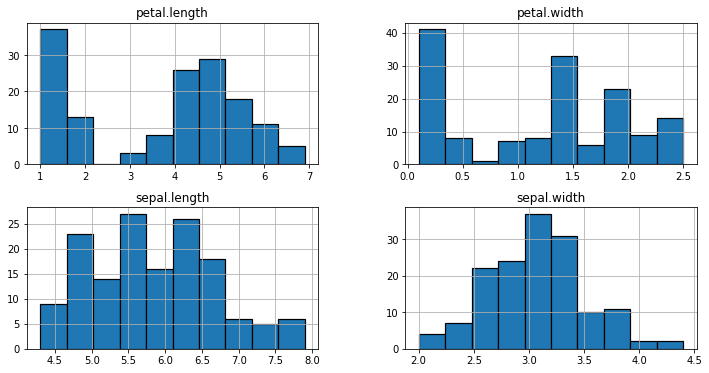

In [9]:
dataset.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()


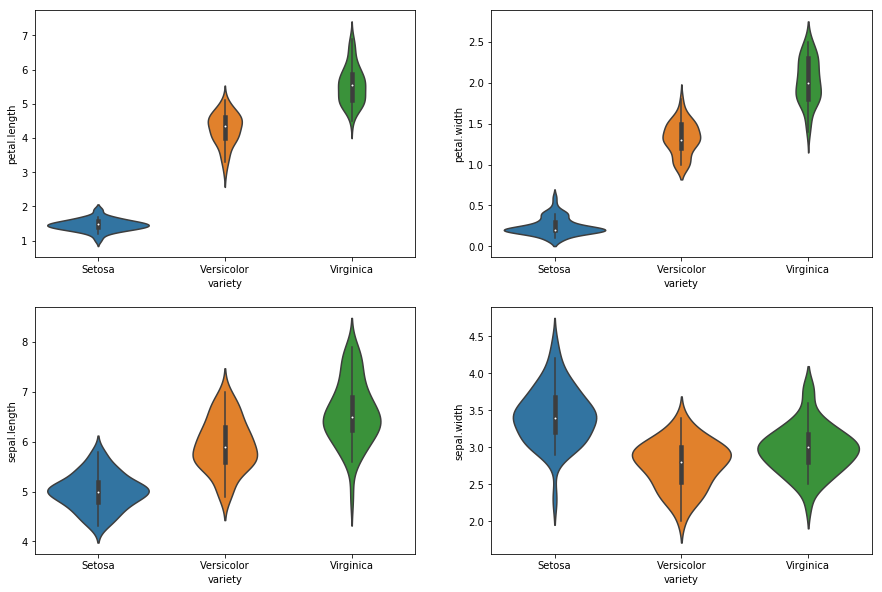

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='variety',y='petal.length',data=dataset)
plt.subplot(2,2,2)
sns.violinplot(x='variety',y='petal.width',data=dataset)
plt.subplot(2,2,3)
sns.violinplot(x='variety',y='sepal.length',data=dataset)
plt.subplot(2,2,4)
sns.violinplot(x='variety',y='sepal.width',data=dataset)

### Splitting data into train and test 

In [25]:
train, test = train_test_split(dataset, test_size = 0.2)
print(train.shape)
print(test.shape)

(120, 5)
(30, 5)


In [27]:
train_X = train[['sepal.length','sepal.width','petal.length','petal.width']]# taking the training data features
train_y=train.variety# output of our training data
test_X= test[['sepal.length','sepal.width','petal.length','petal.width']] # taking test data features
test_y =test.variety   #output value of test data

In [14]:
train_y.head()

105     Virginica
82     Versicolor
85     Versicolor
71     Versicolor
144     Virginica
Name: variety, dtype: object

In [15]:
train_X.head()

,sepal.length,sepal.width,petal.length,petal.width
105,7.6,3.0,6.6,2.1
82,5.8,2.7,3.9,1.2
85,6.0,3.4,4.5,1.6
71,6.1,2.8,4.0,1.3
144,6.7,3.3,5.7,2.5


### Fitting the model for dataset

In [28]:
clf=KNeighborsClassifier(n_neighbors=5).fit(train_X,train_y)

### Predicting target for test dataset

In [29]:
print("accuracy is")
print(accuracy_score(test_y,clf.predict(test_X)))

accuracy is
1.0


### Confusion matrix for test data

In [30]:
knn = KNeighborsClassifier()
knn.fit(train_X, train_y)
predictions = knn.predict(test_X)
#print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(test_y, predictions))

[[ 9  0  0]
 [ 0 12  0]
 [ 0  0  9]]


### Accuracy graph for different n_neighbors 

([<matplotlib.axis.XTick at 0x1897f6fe748>,
 <a list of 10 Text xticklabel objects>)

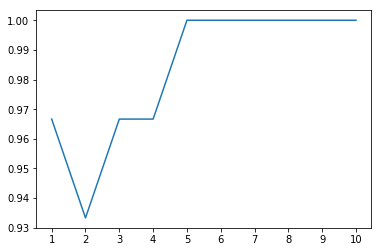

In [31]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
#plt.xlable('value of x for KNN')    
#plt.ylable('accuracy score') 
plt.plot(a_index, a)
plt.xticks(x)

### Accuracy for petal and sepal

In [32]:
petal=dataset[['petal.length','petal.width','variety']]
sepal=dataset[['sepal.length','sepal.width','variety']]

In [33]:
train_p,test_p=train_test_split(petal,test_size=0.2,random_state=0)  #petals
train_x_p=train_p[['petal.width','petal.length']]
train_y_p=train_p.variety
test_x_p=test_p[['petal.width','petal.length']]
test_y_p=test_p.variety


train_s,test_s=train_test_split(sepal,test_size=0.2,random_state=0)  #Sepal
train_x_s=train_s[['sepal.width','sepal.length']]
train_y_s=train_s.variety
test_x_s=test_s[['sepal.width','sepal.length']]
test_y_s=test_s.variety

In [34]:
model=KNeighborsClassifier(n_neighbors=5) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 1.0
The accuracy of the KNN using Sepals is: 0.6666666666666666
